# Simulation of Process Drift

## Setup

In [12]:
import numpy as np
import math
import random
import process_simulation
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

Global settings

In [13]:
load_results_from_path = False

## Replication of Results by Pentland

First simulation with static parameter settings

In [14]:
### simulation parameters
n = 5000 # number of time steps
l = 300 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 100 # size of the history matrix

v = 0.01 # chance of variation

max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.

In [15]:
my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)

In [16]:
adjacency_matrices = my_simulation.run_simulation(record_am=range(0, n, 10))

In [17]:
results_df = process_simulation.summarize_sim_results(adjacency_matrices)
results_df.head()

,number of nodes,number of connected nodes,number of edges,average degree,control flow complexity,depth,density,est. count shortest simple paths
time,,,,,,,,
0,300.0,300.0,299.0,0.996667,298.0,300.0,0.003333,1.000000e+00
10,300.0,300.0,327.0,1.090000,299.0,105.0,0.003645,1.737801e+02
20,300.0,300.0,348.0,1.160000,299.0,56.0,0.003880,8.317638e+03
30,300.0,300.0,369.0,1.230000,299.0,51.0,0.004114,3.981072e+05
40,300.0,300.0,392.0,1.306667,300.0,31.0,0.004370,2.754229e+07


## Comparisson of Complexity metrics

In [18]:
results_df_norm = pd.DataFrame()

# normalize all complexity metrics to plot them in one graph and observe their differences
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in results_df.columns:
    results_df_norm[col] = absolute_maximum_scale(results_df[col])

# drop the number of nodes column
results_df_norm = results_df_norm.drop(columns=['number of nodes'])

# only show a few timestamps
# print(results_df_norm.iloc[::5].to_latex())
results_df_norm.iloc[::100]

,number of connected nodes,number of edges,average degree,control flow complexity,depth,density,est. count shortest simple paths
time,,,,,,,
0,1.000000,0.210563,0.210563,0.993333,1.000000,0.094556,2.089296e-90
1000,1.000000,0.812676,0.812676,1.000000,0.060000,0.364941,5.248075e-22
2000,0.996667,0.934507,0.937632,0.996667,0.060000,0.422467,4.365158e-08
3000,0.966667,0.719014,0.743808,0.966667,0.026667,0.345573,7.585776e-32
4000,0.606667,0.419718,0.691843,0.606667,0.023333,0.513223,3.311311e-57


In [19]:
results_df_norm.corr()

,number of connected nodes,number of edges,average degree,control flow complexity,depth,density,est. count shortest simple paths
number of connected nodes,1.000000,0.811477,0.307547,0.999986,0.322190,-0.843351,0.067394
number of edges,0.811477,1.000000,0.804926,0.812805,0.099331,-0.417668,0.150775
average degree,0.307547,0.804926,1.000000,0.309764,-0.158746,0.184075,0.176018
control flow complexity,0.999986,0.812805,0.309764,1.000000,0.320996,-0.842289,0.067591
depth,0.322190,0.099331,-0.158746,0.320996,1.000000,-0.350440,0.024032
density,-0.843351,-0.417668,0.184075,-0.842289,-0.350440,1.000000,0.017045
est. count shortest simple paths,0.067394,0.150775,0.176018,0.067591,0.024032,0.017045,1.000000


<Figure size 432x288 with 0 Axes>

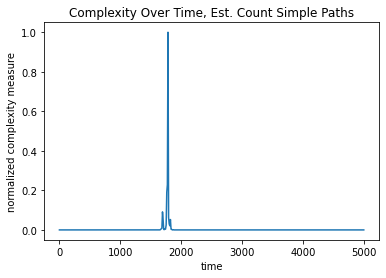

In [67]:
f = plt.figure()
ax = results_df_norm[['est. count shortest simple paths']].plot(title="Complexity Over Time, Est. Count Simple Paths")
ax.set_ylabel("normalized complexity measure")
ax.get_legend().remove()
plt.savefig('experiment_results/plot_complexity_simple paths.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

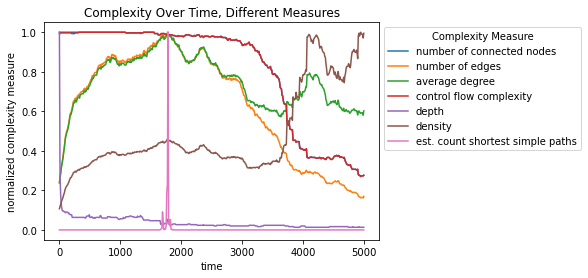

In [68]:
f = plt.figure()
ax = results_df_norm.plot(title="Complexity Over Time, Different Measures")
ax.set_ylabel("normalized complexity measure")
legend = plt.legend(title='Complexity Measure', bbox_to_anchor=(1.0, 1.0))
plt.savefig('experiment_results/plot_complexity_measures.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='time'>

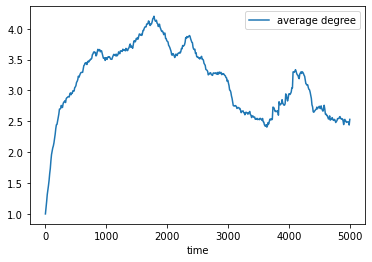

In [58]:
results_df.plot(y='average degree')

<AxesSubplot:xlabel='time'>

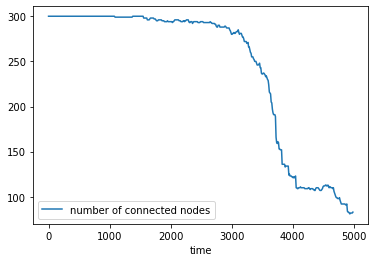

In [59]:
results_df.plot(y='number of connected nodes')

## Plot some graphs at different times    

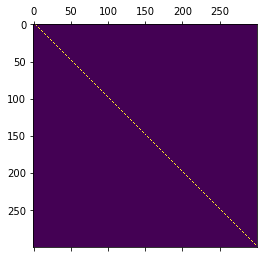

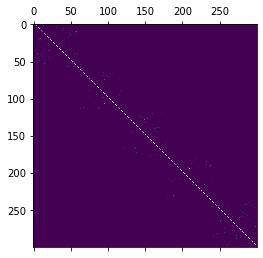

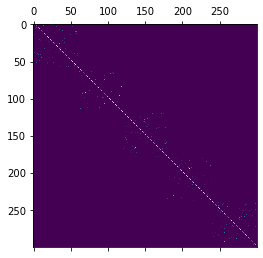

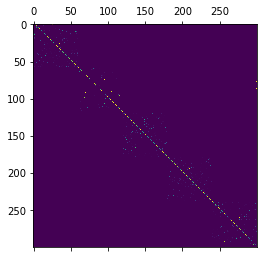

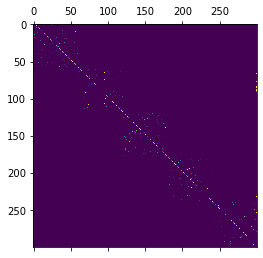

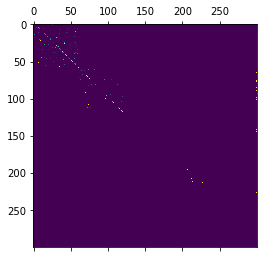

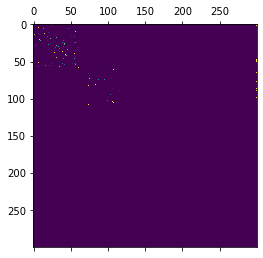

In [76]:
plot_matrixes = [0, 1000, 1500, 2000, 3000, 4000, 4990]
for time, adjacency_matrix in adjacency_matrices.items():
    if time in plot_matrixes:
        # get the graph object
        # graph = nx.from_numpy_matrix(adjacency_matrix)
        # plt.figure(time)
        # nx.draw_kamada_kawai(graph)
        plt.matshow(adjacency_matrix)

In [23]:
### simulation parameters
n = 400 # number of time steps
ls = [100, 400] # 300, 400] # lexicon: number of different process steps
ms = [1, 5, 20] #10, 20] # number of subunits of the process, needs to be a factor of l
rs = [0, 100, 200] #100, 150, 200] # size of the history matrix
vs = [0.001, 0.1] # 0.005, 0.01] # chance of variation

all_results_list = []
for l in ls:
    max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.
    for m in ms:
        for r in rs:
            for v in vs:
                my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)
                adjacency_matrices = my_simulation.run_simulation(record_am=range(1,n+1))
                result_df = process_simulation.summarize_sim_results(adjacency_matrices)
                result_row = result_df.mean(axis=0)

                result = {}
                result['l'] = l
                result['m'] = m
                result['r'] = r
                result['v'] = v
                
                result = result | result_row.to_dict()
                all_results_list.append(result)

OverflowError: (34, 'Result too large')

In [ ]:
results_df = pd.DataFrame(all_results_list)

In [ ]:
results_df[['l', 'm', 'r', 'v', 'est. count shortest simple paths']]

# Extension of the Pentland simulation

For all analyses consider
n = 1000
l = 100
m = 1
r = 50
max_sequence_length = 100 * l

Szenarios to analyze:
1. Impact of degree of automation to process complexity behavior. Investigate a between 0 and 1 in 0.1 steps.
1. Fully automized process with some non-standard case input

### Impact of Degree of Automation
#### RQ1.1

In [23]:
### simulation parameters
## fixed
n = 5000 # number of time steps
l = 200 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 50 # size of the history matrix

max_sequence_length = l * 100 # cut-off sequences longer than this value to avoid infinite loops.

# extended parameters

v_h = 0.005 # chance of variation for a human actor
v_a = 0.0001 # chance of variation for an automized activity

i = 0 # percentage of non-standard case input
v_h_i = v_h # chance of variation for a human actor if process input is non-standard
v_a_i = v_a # chance of variation if automized activity if process input is non-standard

runs_per_experiment = 10 # number of runs for each experiment

# varying

experiments = 2
a_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of activities that are automated

In [24]:
a_results_path = os.path.join('experiment_results', 'results_a_values.pkl')

simulation_results = []
if load_results_from_path:
    with open(a_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for a in a_values:
        print(a)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(a_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

0.0
0.5
1.0


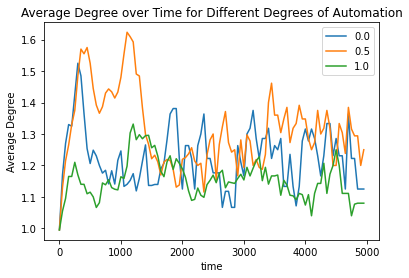

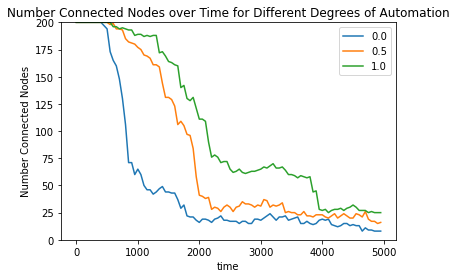

In [28]:
# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, simulation_results):
    simulation_result.plot(y = 'average degree',ax = ax, label = a_value)
ax.set_ylabel("Average Degree")
ax.set_title("Average Degree over Time for Different Degrees of Automation")

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, simulation_results):
    simulation_result.plot(y = 'number of connected nodes',ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time for Different Degrees of Automation")
pass

How do we define a complexity threshold?

Idea: The time when the maximum complexity is reached.

In [ ]:
times_until_maximum_complexity = []
for a_value, simulation_result in zip(a_values, simulation_results):
    time_til_max_complexity = simulation_result['average degree'].idxmax()
    times_until_maximum_complexity.append(time_til_max_complexity)

In [ ]:
times_til_max_complexity_series = pd.Series(times_until_maximum_complexity, a_values)

fig, ax = plt.subplots()
times_til_max_complexity_series.plot()
ax.set_title('Time until Maximum Complexity')
ax.set_ylabel('time')
ax.set_xlabel('degree of automation')
pass

Alternative way: time until the smallest maximum complexity. Need to deduct ca. 20% to account for slower growth in the end phase of the curve.

In [ ]:
# get the smallest maximum complexity
smallest_maximum_complexity = None
for a_value, simulation_result in zip(a_values, simulation_results):
    maximum_complexity = max(simulation_result['average degree'])
    if (smallest_maximum_complexity is None) or (maximum_complexity < smallest_maximum_complexity):
        smallest_maximum_complexity = maximum_complexity

# get the time until 80% of this smallest maximum complexity is reached for all graphs
complexity_threshold = smallest_maximum_complexity * 0.8

times_until_threshold = []
for a_value, simulation_result in zip(a_values, simulation_results):
    # print(simulation_result['average degree'].gt(complexity_threshold))
    time_until_threshold = simulation_result[simulation_result['average degree'].gt(complexity_threshold)].index[0]
    times_until_threshold.append(time_until_threshold)

In [7]:
times_til_max_complexity_series = pd.Series(times_until_threshold, a_values)

fig, ax = plt.subplots()
times_til_max_complexity_series.plot()
ax.set_title('Time until Complexity Threshold')
ax.set_ylabel('time')
ax.set_xlabel('degree of automation')
pass

NameError: name 'times_until_threshold' is not defined

In [ ]:
# compute the correlation
times_til_max_complexity_series.corr(pd.Series(times_til_max_complexity_series.index))

#### RQ1.2

In [ ]:
maximum_complexities = []
for a_value, simulation_result in zip(a_values, simulation_results):
    max_complexity = max(simulation_result['average degree'])
    maximum_complexities.append(max_complexity)

In [ ]:
maximum_complexities_series = pd.Series(maximum_complexities, a_values)

fig, ax = plt.subplots()
maximum_complexities_series.plot()
ax.set_title('Maximum Complexity by Degree of Automation')
ax.set_ylabel('maximum complexity')
ax.set_xlabel('degree of automation')
pass

In [ ]:
# compute the correlation
maximum_complexities_series.corr(pd.Series(maximum_complexities_series.index))

### RQ2

In [ ]:
v_h_i = 0.01 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.03 # chance of variation if automized activity if process input is non-standard

a = 0.5
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [8]:
i_results_path = os.path.join('experiment_results', 'results_i_values_a_050.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_experiments=montecarlo_runs)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

#### RQ2.1

NameError: name 'i_values' is not defined

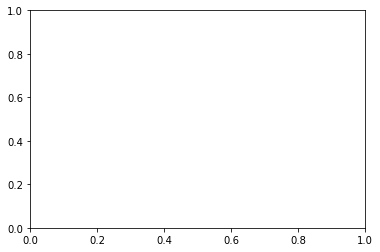

In [9]:
# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'average degree',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'number_of_connected_nodes',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_ylim(0, l)
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")
pass

In [74]:
# get the smallest maximum complexity
smallest_maximum_complexity = None
for i_value, simulation_result in zip(i_values, simulation_results):
    maximum_complexity = max(simulation_result['average degree'])
    if (smallest_maximum_complexity is None) or (maximum_complexity < smallest_maximum_complexity):
        smallest_maximum_complexity = maximum_complexity

# get the time until 80% of this smallest maximum complexity is reached for all graphs
complexity_threshold = smallest_maximum_complexity * 0.8

times_until_threshold = []
for i_value, simulation_result in zip(i_values, simulation_results):
    # print(simulation_result['average degree'].gt(complexity_threshold))
    time_until_threshold = simulation_result[simulation_result['average degree'].gt(complexity_threshold)].index[0]
    times_until_threshold.append(time_until_threshold)

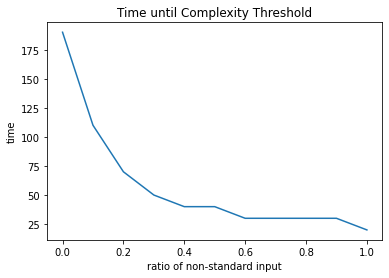

In [75]:
times_til_max_complexity_series = pd.Series(times_until_threshold, i_values)

fig, ax = plt.subplots()
times_til_max_complexity_series.plot()
ax.set_title('Time until Complexity Threshold')
ax.set_ylabel('time')
ax.set_xlabel('ratio of non-standard input')
pass

In [76]:
# compute the correlation
times_til_max_complexity_series.corr(pd.Series(times_til_max_complexity_series.index))

-0.9999999999999998

#### RQ2.2

In [77]:
maximum_complexities = []
for i_value, simulation_result in zip(i_values, simulation_results):
    max_complexity = max(simulation_result['average degree'])
    maximum_complexities.append(max_complexity)

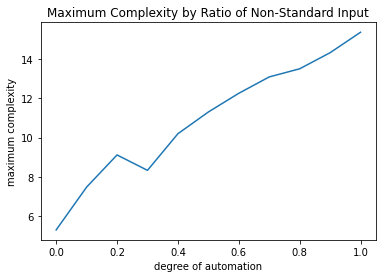

In [78]:
maximum_complexities_series = pd.Series(maximum_complexities, i_values)

fig, ax = plt.subplots()
maximum_complexities_series.plot()
ax.set_title('Maximum Complexity by Ratio of Non-Standard Input')
ax.set_ylabel('maximum complexity')
ax.set_xlabel('ratio of non-standard process items')
pass

In [79]:
# compute the correlation
maximum_complexities_series.corr(pd.Series(maximum_complexities_series.index))

0.9999999999999998

## RQ2 with a=0

In [81]:
v_h_i = 0.1 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.3 # chance of variation if automized activity if process input is non-standard

a = 0
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [82]:
i_results_path = os.path.join('experiment_results', 'results_i_values_a_000.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_experiments=montecarlo_runs)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


#### RQ2.1

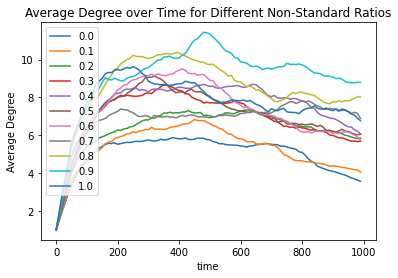

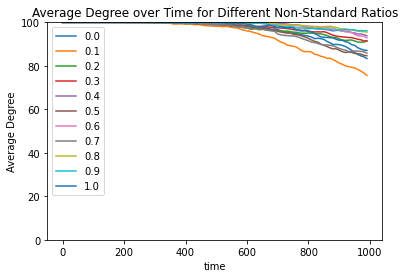

In [83]:
# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'average degree',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'number_of_connected_nodes',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_ylim(0, l)
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")
pass

In [84]:
# get the smallest maximum complexity
smallest_maximum_complexity = None
for i_value, simulation_result in zip(i_values, simulation_results):
    maximum_complexity = max(simulation_result['average degree'])
    if (smallest_maximum_complexity is None) or (maximum_complexity < smallest_maximum_complexity):
        smallest_maximum_complexity = maximum_complexity

# get the time until 80% of this smallest maximum complexity is reached for all graphs
complexity_threshold = smallest_maximum_complexity * 0.8

times_until_threshold = []
for i_value, simulation_result in zip(i_values, simulation_results):
    # print(simulation_result['average degree'].gt(complexity_threshold))
    time_until_threshold = simulation_result[simulation_result['average degree'].gt(complexity_threshold)].index[0]
    times_until_threshold.append(time_until_threshold)

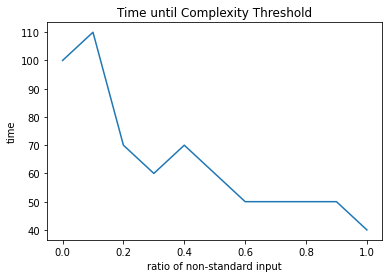

In [85]:
times_til_max_complexity_series = pd.Series(times_until_threshold, i_values)

fig, ax = plt.subplots()
times_til_max_complexity_series.plot()
ax.set_title('Time until Complexity Threshold')
ax.set_ylabel('time')
ax.set_xlabel('ratio of non-standard input')
pass

In [86]:
# compute the correlation
times_til_max_complexity_series.corr(pd.Series(times_til_max_complexity_series.index))

-0.9999999999999998

#### RQ2.2

In [87]:
maximum_complexities = []
for i_value, simulation_result in zip(i_values, simulation_results):
    max_complexity = max(simulation_result['average degree'])
    maximum_complexities.append(max_complexity)

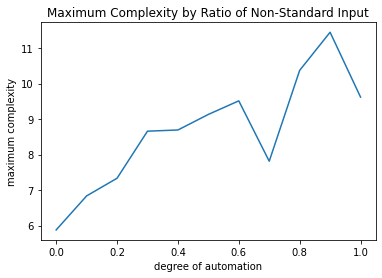

In [88]:
maximum_complexities_series = pd.Series(maximum_complexities, i_values)

fig, ax = plt.subplots()
maximum_complexities_series.plot()
ax.set_title('Maximum Complexity by Ratio of Non-Standard Input')
ax.set_ylabel('maximum complexity')
ax.set_xlabel('degree of automation')
pass

In [89]:
# compute the correlation
maximum_complexities_series.corr(pd.Series(maximum_complexities_series.index))

0.9999999999999998

## RQ2 with a=100%

In [90]:
v_h_i = 0.1 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.3 # chance of variation if automized activity if process input is non-standard

a = 1
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [91]:
i_results_path = os.path.join('experiment_results', 'results_i_values_a_100.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_experiments=montecarlo_runs)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


#### RQ2.1

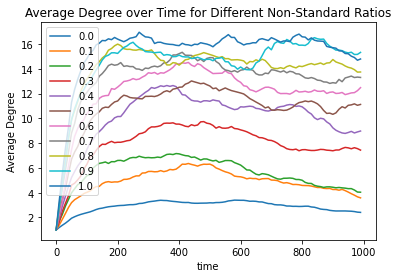

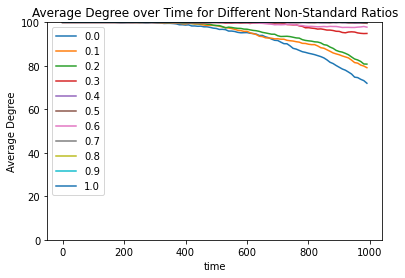

In [92]:
# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'average degree',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for i_value, simulation_result in zip(i_values, simulation_results):
    simulation_result.plot(y = 'number_of_connected_nodes',ax = ax, label = i_value)
ax.set_ylabel("Average Degree")
ax.set_ylim(0, l)
ax.set_title("Average Degree over Time for Different Non-Standard Ratios")
pass

In [93]:
# get the smallest maximum complexity
smallest_maximum_complexity = None
for i_value, simulation_result in zip(i_values, simulation_results):
    maximum_complexity = max(simulation_result['average degree'])
    if (smallest_maximum_complexity is None) or (maximum_complexity < smallest_maximum_complexity):
        smallest_maximum_complexity = maximum_complexity

# get the time until 80% of this smallest maximum complexity is reached for all graphs
complexity_threshold = smallest_maximum_complexity * 0.8

times_until_threshold = []
for i_value, simulation_result in zip(i_values, simulation_results):
    # print(simulation_result['average degree'].gt(complexity_threshold))
    time_until_threshold = simulation_result[simulation_result['average degree'].gt(complexity_threshold)].index[0]
    times_until_threshold.append(time_until_threshold)

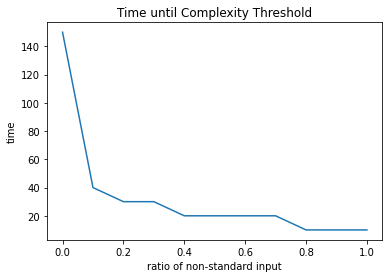

In [94]:
times_til_max_complexity_series = pd.Series(times_until_threshold, i_values)

fig, ax = plt.subplots()
times_til_max_complexity_series.plot()
ax.set_title('Time until Complexity Threshold')
ax.set_ylabel('time')
ax.set_xlabel('ratio of non-standard input')
pass

In [95]:
# compute the correlation
times_til_max_complexity_series.corr(pd.Series(times_til_max_complexity_series.index))

-0.9999999999999998

#### RQ2.2

In [96]:
maximum_complexities = []
for i_value, simulation_result in zip(i_values, simulation_results):
    max_complexity = max(simulation_result['average degree'])
    maximum_complexities.append(max_complexity)

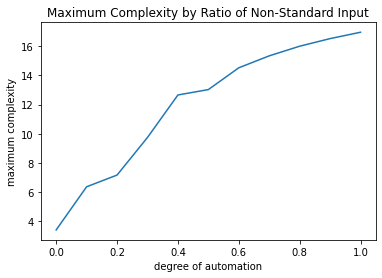

In [97]:
maximum_complexities_series = pd.Series(maximum_complexities, i_values)

fig, ax = plt.subplots()
maximum_complexities_series.plot()
ax.set_title('Maximum Complexity by Ratio of Non-Standard Input')
ax.set_ylabel('maximum complexity')
ax.set_xlabel('degree of automation')
pass

In [98]:
# compute the correlation
maximum_complexities_series.corr(pd.Series(maximum_complexities_series.index))

0.9999999999999998

## To be deleted

In [80]:
plot_matrixes = [0, 100, 990]
for time, adjacency_matrix in ams.items():
    if time in plot_matrixes:
        # get the graph object
        graph = nx.from_numpy_matrix(adjacency_matrix)
        plt.figure(time)
        nx.draw_kamada_kawai(graph)
        plt.matshow(adjacency_matrix)

NameError: name 'ams' is not defined